In [1]:
# Importing the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the Dataset
df = pd.read_csv('Walmart.csv')  


In [3]:
# Priview the dataset
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
# Exploratory Data Analysis (EDA)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)


In [6]:
# Feature Engineering
df['Month'] = df.index.month
df['Week'] = df.index.isocalendar().week.astype(int)
df['Year'] = df.index.year
df['Lag_1'] = df['Weekly_Sales'].shift(1)
df['Rolling_Mean_3'] = df['Weekly_Sales'].rolling(window=3).mean()

In [7]:
# Drop rows with NaNs from lag/rolling features
df.dropna(inplace=True)

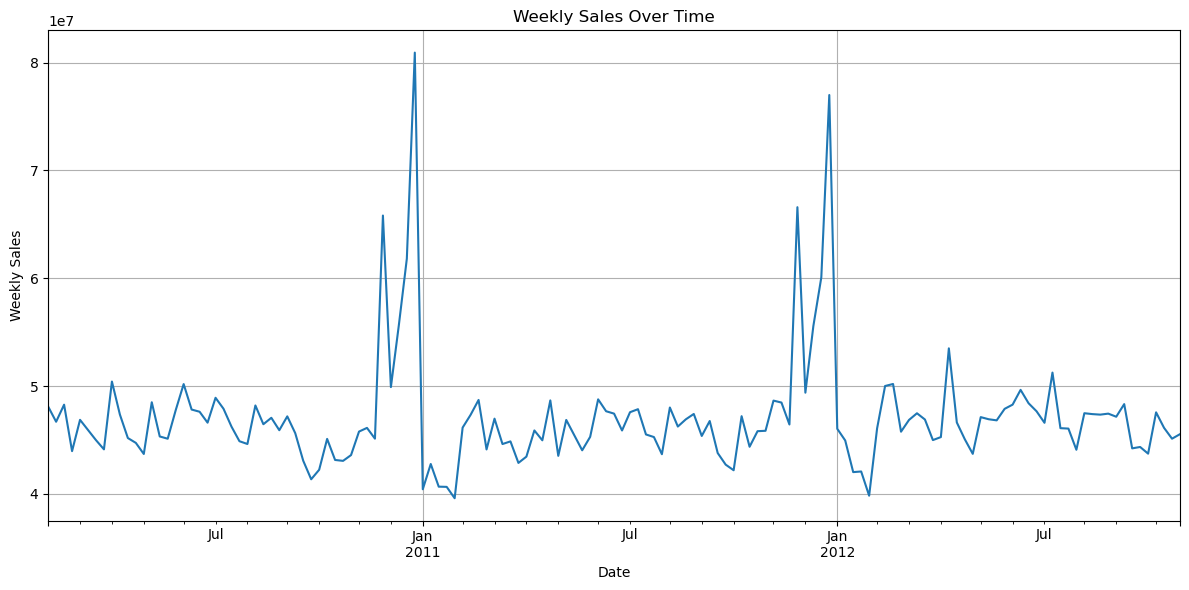

In [8]:
# Visualize Sales Trends
plt.figure(figsize=(12, 6))
df['Weekly_Sales'].resample('W').sum().plot()
plt.title("Weekly Sales Over Time")
plt.ylabel("Weekly Sales")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# Splitting dataset into dependent and independent variables
features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
            'CPI', 'Unemployment', 'Month', 'Week', 'Year',
            'Lag_1', 'Rolling_Mean_3']
X = df[features]
y = df['Weekly_Sales']

In [10]:
#  Splitting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)


In [11]:
# Train XGBoost Model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [16]:
# Evaluation
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2 Score (Accuracy): {r2:.4f}")


RMSE: 49072.74
MAE: 31304.72
R^2 Score (Accuracy): 0.9841


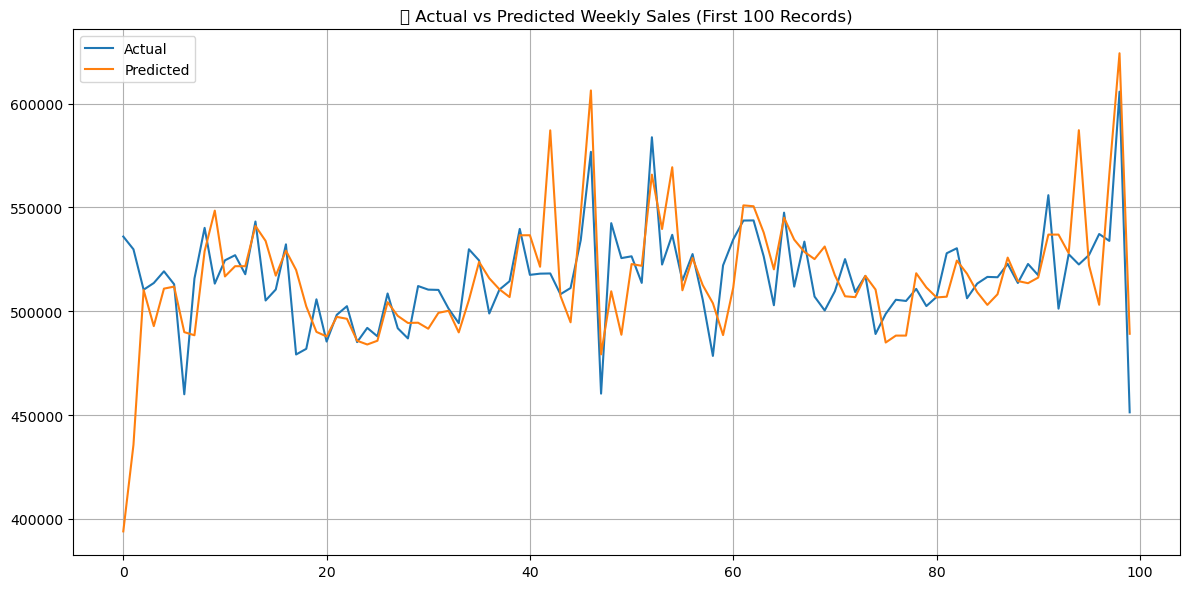

In [17]:
# Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.title("🟦 Actual vs Predicted Weekly Sales (First 100 Records)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()